# **Bellman-Ford algorithm**

- Nodes: s, t, x, y, z
- Edges and weights:
 - (s, t) with weight 6
 - (t, x) with weight 5
 - (s, y) with weight 7
 - (t, y) with weight 8
 - (y, x) with weight -3
 - (t, z) with weight -4
 - (z, x) with weight 7
 - (y, z) with weight 9
 - (z, s) with weight 2
 - (x, t) with weight -2

In [1]:
def bellman_ford(graph, start):
    # Initialize distances with infinity for all nodes except the start node
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    # Relax edges repeatedly
    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbor, weight in graph[node].items():
                # Relax the edge
                if distances[node] + weight < distances[neighbor]:
                    distances[neighbor] = distances[node] + weight

    # Check for negative cycles
    for node in graph:
        for neighbor, weight in graph[node].items():
            if distances[node] + weight < distances[neighbor]:
                raise ValueError("Graph contains a negative cycle")

    return distances

# Define the graph
graph = {
    's': {'t': 6, 'y': 7, 'z': 2},
    't': {'x': 5, 'y': 8, 'z': -4},
    'x': {'t': -2},
    'y': {'x': -3, 'z': 9},
    'z': {'x': 7, 's': 2}
}

# Find the shortest paths from 's' to all other nodes
shortest_paths = bellman_ford(graph, 's')

# Print the shortest paths
print("Shortest paths from 's':")
for node, distance in shortest_paths.items():
    print(f"To node {node}: Distance {distance}")


Shortest paths from 's':
To node s: Distance 0
To node t: Distance 2
To node x: Distance 4
To node y: Distance 7
To node z: Distance -2


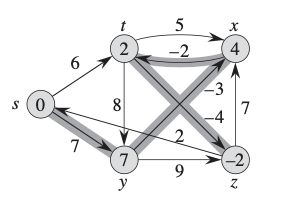